In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import geopandas as gpd
import plotly.graph_objs as go
sns.set_theme()

## Upload the datasets
Quick Dataset Overview

In [4]:
demo=pd.read_csv("C:\\Users\DannyC19\Desktop\Python\EDA project\Germany\demographics_de.csv")
print(demo.shape)
demo.head()

(192, 4)


,state,gender,age_group,population
0,Baden-Wuerttemberg,female,00-04,261674
1,Baden-Wuerttemberg,female,05-14,490822
2,Baden-Wuerttemberg,female,15-34,1293488
3,Baden-Wuerttemberg,female,35-59,1919649
4,Baden-Wuerttemberg,female,60-79,1182736


In [21]:
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   state       192 non-null    object
 1   gender      192 non-null    object
 2   age_group   192 non-null    object
 3   population  192 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.1+ KB


In [ ]:
demo.nunique()

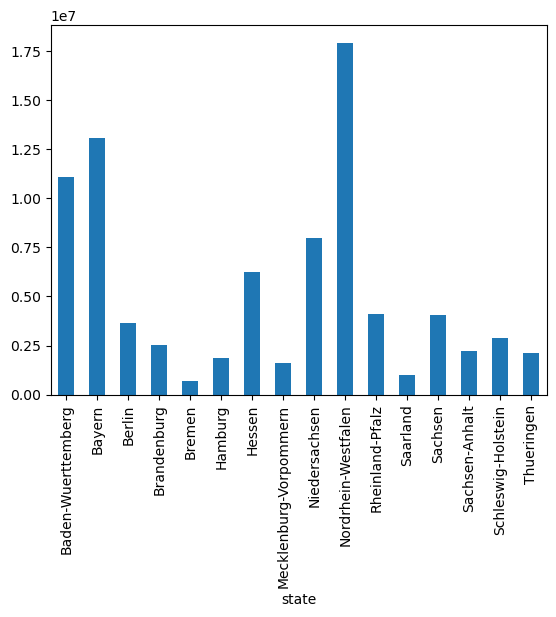

In [143]:
covid=pd.read_csv("C:\\Users\DannyC19\Desktop\Python\EDA project\Germany\covid_de.csv",parse_dates = ['date'], index_col="date")
print(covid.shape)
covid.sample(7)

(2790555, 7)


,state,county,age_group,gender,cases,deaths,recovered
date,,,,,,,
2021-01-12,Bayern,LK Hassberge,35-59,F,6,0,6
2022-03-15,Baden-Wuerttemberg,LK Tuebingen,35-59,M,158,0,158
2022-03-03,Thueringen,LK Ilm-Kreis,00-04,M,7,0,7
2022-06-21,Baden-Wuerttemberg,LK Bodenseekreis,15-34,M,35,0,35
2021-08-20,Thueringen,LK Nordhausen,15-34,M,1,0,1
2022-03-26,Niedersachsen,LK Rotenburg,60-79,M,40,1,39
2022-05-07,Baden-Wuerttemberg,LK Sigmaringen,15-34,F,2,0,2


In [8]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2890909 entries, 2020-03-27 to 2022-08-24
Data columns (total 7 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   state      object
 1   county     object
 2   age_group  object
 3   gender     object
 4   cases      int64 
 5   deaths     int64 
 6   recovered  int64 
dtypes: int64(3), object(4)
memory usage: 176.4+ MB


In [ ]:
covid.nunique()

In [ ]:
covid.describe()

In [ ]:
#Using boxplots to identify outliers within numeric data
fig, ax = plt.subplots(nrows=1, ncols=1)
ax = covid.boxplot()
fig.tight_layout()

In [5]:
vaccines=pd.read_csv("C:\\Users\DannyC19\Desktop\Python\EDA project\Germany\covid_de_vaccines.csv",parse_dates = ['date'],index_col="date")
print(vaccines.shape)
vaccines.head(7)

(757, 8)


,doses,doses_first,doses_second,pfizer_cumul,moderna_cumul,astrazeneca_cumul,persons_first_cumul,persons_full_cumul
date,,,,,,,,
2020-12-27,24427,24427,0,24418,8,1,24427,0
2020-12-28,18073,18073,0,42489,9,2,42500,0
2020-12-29,50229,50229,0,92717,9,3,92729,0
2020-12-30,64213,64213,0,156929,10,3,156942,0
2020-12-31,49985,49985,0,206912,12,3,206927,0
2021-01-01,25723,25723,0,232614,27,7,232650,0
2021-01-02,47835,47835,0,280446,28,7,280485,0


In [6]:
vaccines.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 757 entries, 2020-12-27 to 2023-01-22
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   doses                757 non-null    int64
 1   doses_first          757 non-null    int64
 2   doses_second         757 non-null    int64
 3   pfizer_cumul         757 non-null    int64
 4   moderna_cumul        757 non-null    int64
 5   astrazeneca_cumul    757 non-null    int64
 6   persons_first_cumul  757 non-null    int64
 7   persons_full_cumul   757 non-null    int64
dtypes: int64(8)
memory usage: 53.2 KB


In [7]:
vaccines.nunique()

doses                  755
doses_first            729
doses_second           719
pfizer_cumul           757
moderna_cumul          752
astrazeneca_cumul      573
persons_first_cumul    757
persons_full_cumul     739
dtype: int64

In [ ]:
vaccines.hist(figsize=(10,7))
plt.tight_layout()
plt.show()

In [ ]:
#Using boxplots to identify outliers within numeric data
fig, ax = plt.subplots(nrows=1, ncols=1)
ax = vaccines.boxplot()
fig.tight_layout()
# astrazeneca_cumul & persons_first_cumul have outliers

## Identify Missing Data

In [6]:
print(demo.isnull().sum())
print(covid.isnull().sum())
print(vaccines.isnull().sum())

state         0
gender        0
age_group     0
population    0
dtype: int64
state             0
county            0
age_group     13876
gender       125625
cases             0
deaths            0
recovered         0
dtype: int64
doses                  0
doses_first            0
doses_second           0
pfizer_cumul           0
moderna_cumul          0
astrazeneca_cumul      0
persons_first_cumul    0
persons_full_cumul     0
dtype: int64


In [7]:
#rows that miss both age_group and gender
covid[covid.age_group.isnull() &covid.gender.isnull()]

,state,county,age_group,gender,cases,deaths,recovered
date,,,,,,,
2022-02-18,Baden-Wuerttemberg,LK Alb-Donau-Kreis,NaN,NaN,1,0,1
2022-01-19,Baden-Wuerttemberg,LK Boeblingen,NaN,NaN,1,0,1
2022-01-20,Baden-Wuerttemberg,LK Boeblingen,NaN,NaN,1,0,1
2022-01-25,Baden-Wuerttemberg,LK Boeblingen,NaN,NaN,1,0,1
2022-01-31,Baden-Wuerttemberg,LK Boeblingen,NaN,NaN,1,0,1
...,...,...,...,...,...,...,...
2021-03-24,Thueringen,LK Sonneberg,NaN,NaN,2,0,2
2021-11-24,Thueringen,LK Unstrut-Hainich-Kreis,NaN,NaN,1,0,1
2022-12-20,Thueringen,SK Jena,NaN,NaN,1,0,1


In [14]:
#Percentage of missing age data out of all

print(f'In age_group {len(covid[covid.age_group.isnull()])*100/len(covid)}% of values are missing')

In age_group 0.47998743647759234% of values are missing


In [15]:
#Percentage of missing gender data out of all
print(f'In gender {len(covid[covid.gender.isnull()])*100/len(covid)}% of values are missing')

In gender 4.34551900457607% of values are missing


## Demographic parameters

In [41]:
demo

,state,gender,age_group,population
0,Baden-Wuerttemberg,female,00-04,261674
1,Baden-Wuerttemberg,female,05-14,490822
2,Baden-Wuerttemberg,female,15-34,1293488
3,Baden-Wuerttemberg,female,35-59,1919649
4,Baden-Wuerttemberg,female,60-79,1182736
...,...,...,...,...
187,Thueringen,male,05-14,92545
188,Thueringen,male,15-34,214553
189,Thueringen,male,35-59,384822
190,Thueringen,male,60-79,264189


83019213
  age_group     female       male
0     00-04   2.426061  -2.303443
1     05-14   4.561119  -4.309620
2     15-34  12.018577 -11.124395
3     35-59  17.673485 -17.424221
4     60-79  10.227579 -11.440104
5     80-99   2.439215  -4.052181


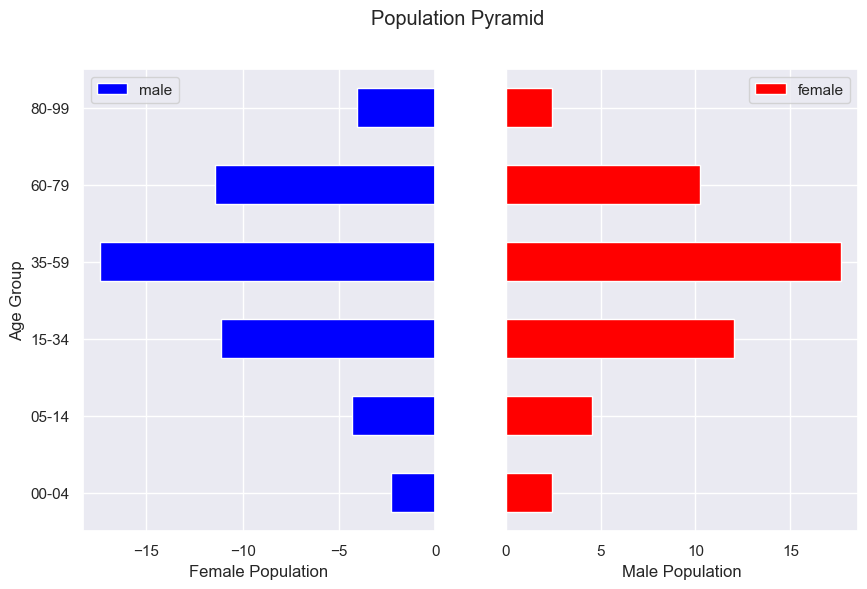

In [141]:
total=demo[['age_group','gender','population']] # df without states
print(demo['population'].sum())           # total population in Germany
total['percent']=(total['population']/demo['population'].sum())*100
dummies = pd.get_dummies(total['gender'])
total = pd.concat([total, dummies], axis=1) #concatinate with total
total = total.drop('gender', axis=1)
total

g=pd.get_dummies(group,columns=["gender"])
g.loc[g['gender_female'] == 1, 'percent'] *= -1
# pivot the DataFrame
g_pivot = pd.pivot_table(g, index='age_group', columns='gender_female', values='percent')

# rename the columns
g_pivot.columns = ['female', 'male']

# reset the index
g_pivot = g_pivot.reset_index()
print(g_pivot)

# create two subplots for the pyramid
fig, ax = plt.subplots(ncols=2, sharey=True, figsize=(10, 6))

# plot the male data
g_pivot.plot(x='age_group', y='male', kind='barh', color='blue', ax=ax[0])
ax[1].set_xlabel('Male Population')

# plot the female data
g_pivot.plot(x='age_group', y='female', kind='barh', color='red', ax=ax[1])
ax[0].set_xlabel('Female Population')


# add a title and labels to the figure
fig.suptitle('Population Pyramid')
ax[0].set_ylabel('Age Group')
ax[1].set_ylabel('')

plt.show()



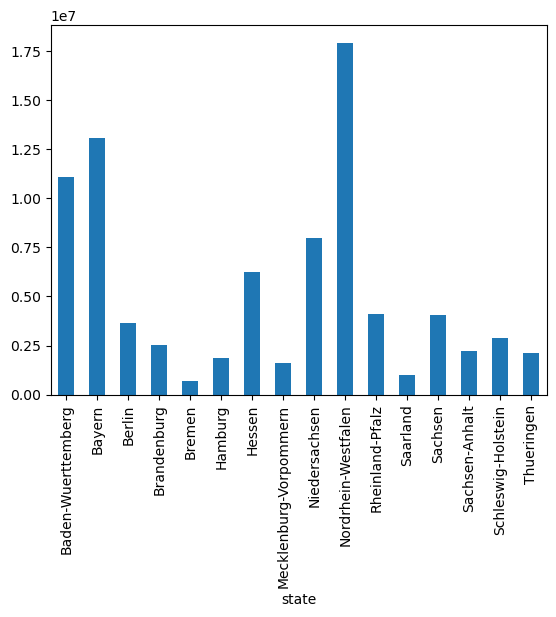

In [49]:
#population by state
demo.groupby('state')['population'].sum().plot.bar()
plt.show()

<AxesSubplot:>

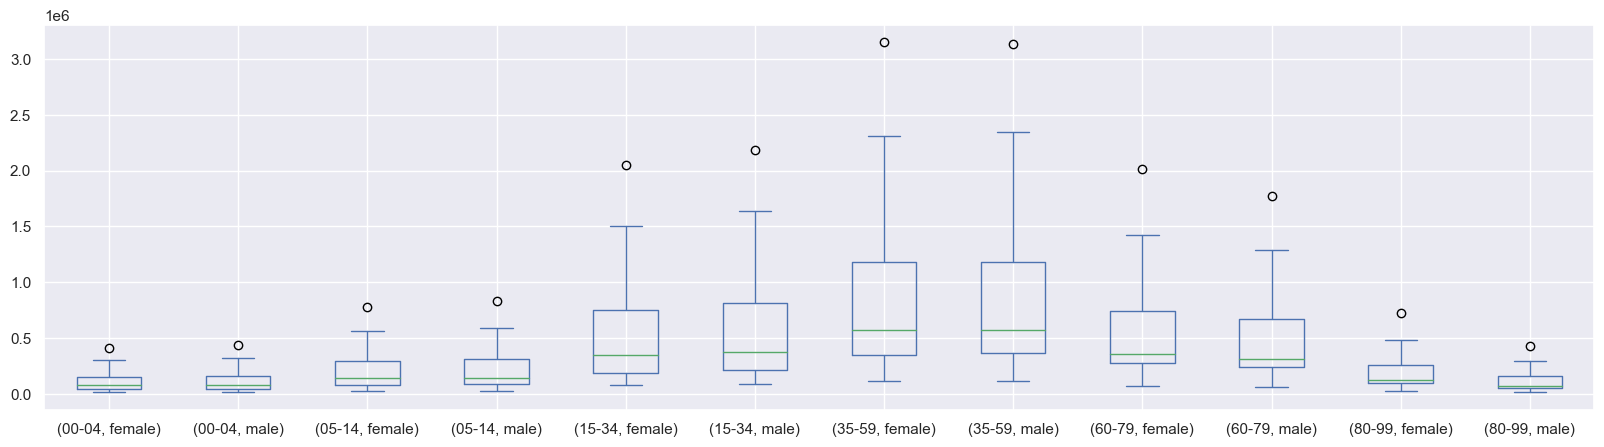

In [156]:
demo.pivot_table(index='state',columns=['age_group','gender'], values="population", aggfunc='sum').plot.box(figsize=(20,5))


<AxesSubplot:xlabel='state'>

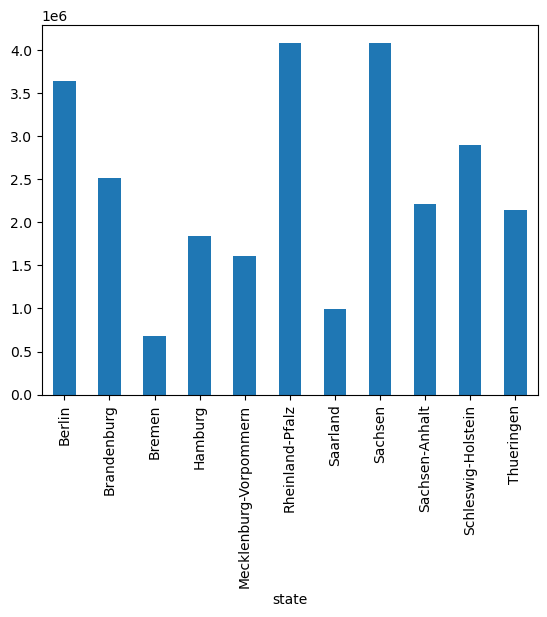

In [56]:
#divide the states to small and large by population
small=demo.groupby('state').filter(lambda grp:grp['population'].sum()<5000000)
large=demo.groupby('state').filter(lambda grp:grp['population'].sum()>5000000)
small.groupby('state')['population'].sum().plot.bar()

<AxesSubplot:xlabel='state'>

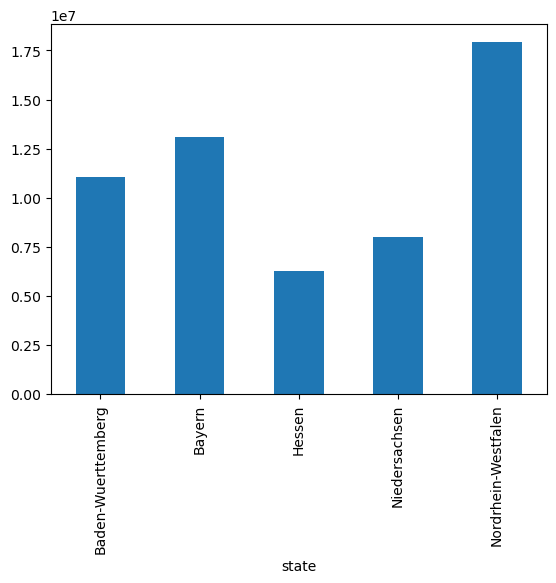

In [57]:
large.groupby('state')['population'].sum().plot.bar()

<AxesSubplot:xlabel='state'>

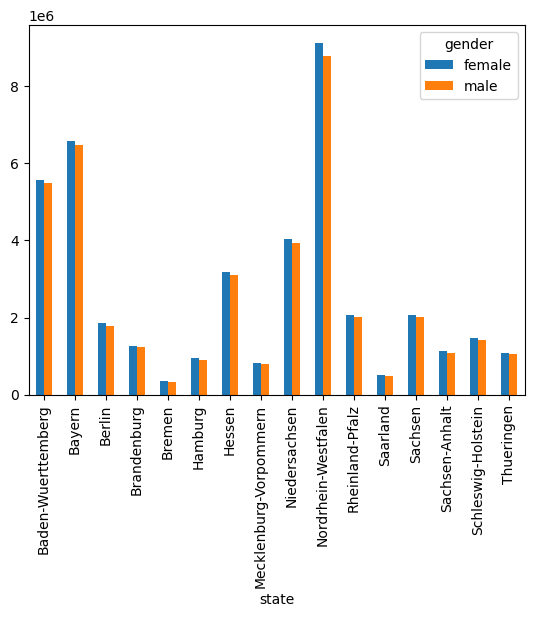

In [18]:
#number of male/ female by state
demo.pivot_table(index='state', columns='gender',values='population', aggfunc='sum').plot.bar()

<AxesSubplot:xlabel='state'>

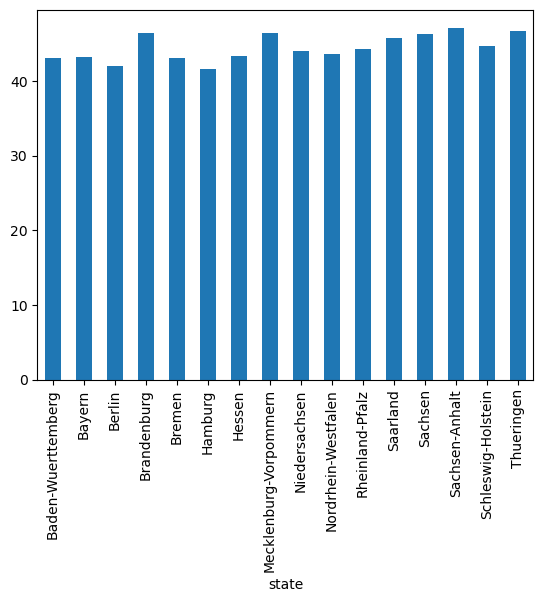

In [46]:

#avg age by state
demo_age=demo[['state','age_group','population']]
demo_age=demo_age.replace({'00-04':2, '05-14':9.5, '15-34':24.5, '35-59':47, '60-79':69.5, '80-99':89.5})

demo_age['a_pop']=demo_age['age_group']*demo_age['population']
total=demo.groupby('state')['population'].sum()


ave=demo_age.groupby('state')['a_pop'].sum()/total
ave.plot.bar()
# no significant difference

<AxesSubplot:xlabel='state'>

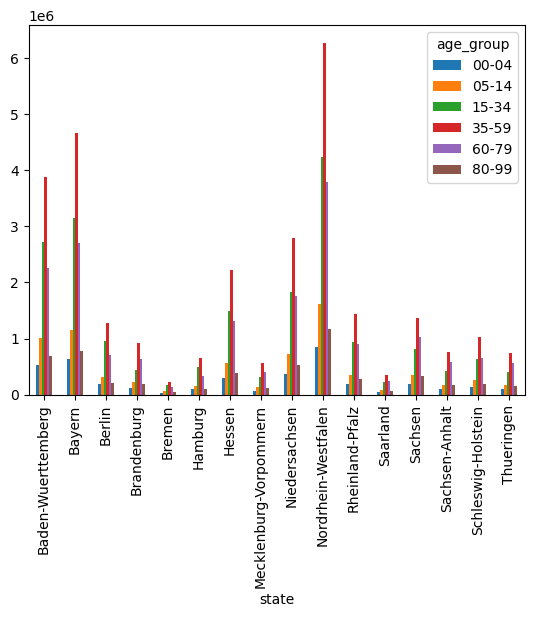

In [48]:
#Age representation per state
#demo.pivot_table(index="state", columns="age_group", values="population",aggfunc="sum").plot.bar()
demo.pivot_table(index="state", columns="age_group", values="population",aggfunc="sum").plot.bar()

## Vaccines analysis

### manufacturers

In [8]:
vaccines

,doses,doses_first,doses_second,pfizer_cumul,moderna_cumul,astrazeneca_cumul,persons_first_cumul,persons_full_cumul
date,,,,,,,,
2020-12-27,24427,24427,0,24418,8,1,24427,0
2020-12-28,18073,18073,0,42489,9,2,42500,0
2020-12-29,50229,50229,0,92717,9,3,92729,0
2020-12-30,64213,64213,0,156929,10,3,156942,0
2020-12-31,49985,49985,0,206912,12,3,206927,0
...,...,...,...,...,...,...,...,...
2023-01-18,15120,688,312,138014658,31577922,12803023,64866267,63553167
2023-01-19,16594,314,381,138015809,31577955,12803023,64866581,63553548
2023-01-20,10565,334,235,138016521,31578012,12803023,64866915,63553783


In [9]:
# Add colums with manufacturers - convert the cummulative sum into real values
vaccines['pfizer']=vaccines['pfizer_cumul'].diff().fillna(vaccines['pfizer_cumul'].iloc[0])
vaccines['moderna']=vaccines['moderna_cumul'].diff().fillna(vaccines['moderna_cumul'].iloc[0])
vaccines['astrazeneca']=vaccines['astrazeneca_cumul'].diff().fillna(vaccines['astrazeneca_cumul'].iloc[0])
vaccines.tail(10)


,doses,doses_first,doses_second,pfizer_cumul,moderna_cumul,astrazeneca_cumul,persons_first_cumul,persons_full_cumul,pfizer,moderna,astrazeneca
date,,,,,,,,,,,
2023-01-13,17508,371,342,138011328,31577742,12803023,64865053,63552354,1176.0,206.0,1.0
2023-01-14,2901,63,68,138011559,31577752,12803023,64865116,63552422,231.0,10.0,0.0
2023-01-15,1536,27,33,138011843,31577843,12803023,64865143,63552455,284.0,91.0,0.0
2023-01-16,6997,134,148,138012394,31577873,12803023,64865277,63552603,551.0,30.0,0.0
2023-01-17,14922,302,252,138013524,31577881,12803023,64865579,63552855,1130.0,8.0,0.0
2023-01-18,15120,688,312,138014658,31577922,12803023,64866267,63553167,1134.0,41.0,0.0
2023-01-19,16594,314,381,138015809,31577955,12803023,64866581,63553548,1151.0,33.0,0.0
2023-01-20,10565,334,235,138016521,31578012,12803023,64866915,63553783,712.0,57.0,0.0
2023-01-21,1395,45,19,138016565,31578013,12803023,64866960,63553802,44.0,1.0,0.0


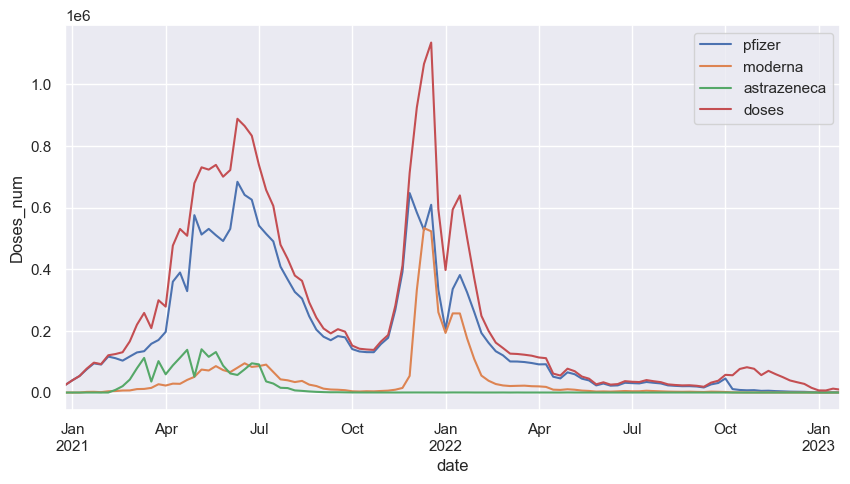

In [29]:
#What is the contribution of each manufacturer?
week_vac=vaccines.resample('W').mean()
week_vac[['pfizer', 'moderna','astrazeneca','doses']].plot(figsize=(10,5), ylabel="Doses_num")
plt.show()
#The most commony used manufacturer in Germany is pfizer
#Looks like there is other manufacturers present

In [15]:
#Does all manufacturers sum to the daily doses number?
#len(vaccines[vaccines['doses']==vaccines['pfizer']+vaccines['moderna']+vaccines['astrazeneca']].index)
print(f"There are only {len(vaccines[(vaccines['doses'] == vaccines['pfizer'] + vaccines['moderna'] + vaccines['astrazeneca'])].index)} days in which all manufacturers sum to the daily doses number")
vaccines[vaccines['doses']==vaccines['pfizer']+vaccines['moderna']+vaccines['astrazeneca'] ].index
#There are other manufacturers not presented in the data

There are only 43 days in which all manufacturers sum to the daily doses number


DatetimeIndex(['2020-12-27', '2020-12-28', '2020-12-29', '2020-12-30',
               '2020-12-31', '2021-01-03', '2021-01-05', '2021-01-06',
               '2021-01-08', '2021-01-09', '2021-01-11', '2021-01-13',
               '2021-01-14', '2021-01-18', '2021-01-19', '2021-01-20',
               '2021-01-22', '2021-01-23', '2021-01-25', '2021-01-26',
               '2021-01-28', '2021-02-04', '2021-02-09', '2021-02-25',
               '2021-02-26', '2021-03-01', '2021-03-02', '2021-03-04',
               '2021-03-06', '2021-03-07', '2021-03-09', '2021-03-11',
               '2021-03-13', '2021-03-14', '2021-03-15', '2021-03-16',
               '2021-03-18', '2021-03-19', '2021-03-20', '2021-03-22',
               '2021-04-03', '2021-04-05', '2021-04-17'],
              dtype='datetime64[ns]', name='date', freq=None)

In [88]:
#create another colum for other manufacturers
vaccines['other']=vaccines['doses']-(vaccines['moderna']+vaccines['astrazeneca']+vaccines['pfizer'])
vaccines

,doses,doses_first,doses_second,doses_third,persons_full,persons_first_cumul,persons_full_cumul,pfizer_cumul,moderna_cumul,astrazeneca_cumul,pfizer,moderna,astrazeneca,pfizer%,moderna%,astrazeneca%,other
date,,,,,,,,,,,,,,,,,
2020-12-27,24427,24427,0,0,0.0,24427,0,24418,8,1,24418.0,8.0,1.0,99.963156,0.032751,0.004094,0.0
2020-12-28,18073,18073,0,0,0.0,42500,0,42489,9,2,18071.0,1.0,1.0,99.988934,0.005533,0.005533,0.0
2020-12-29,50229,50229,0,0,0.0,92729,0,92717,9,3,50228.0,0.0,1.0,99.998009,0.000000,0.001991,0.0
2020-12-30,64213,64213,0,0,0.0,156942,0,156929,10,3,64212.0,1.0,0.0,99.998443,0.001557,0.000000,0.0
2020-12-31,49985,49985,0,0,0.0,206927,0,206912,12,3,49983.0,2.0,0.0,99.995999,0.004001,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-18,15120,688,312,14120,312.0,64866267,63553167,138014658,31577922,12803023,1134.0,41.0,0.0,7.500000,0.271164,0.000000,13945.0
2023-01-19,16594,314,381,15899,381.0,64866581,63553548,138015809,31577955,12803023,1151.0,33.0,0.0,6.936242,0.198867,0.000000,15410.0
2023-01-20,10565,334,235,9996,235.0,64866915,63553783,138016521,31578012,12803023,712.0,57.0,0.0,6.739233,0.539517,0.000000,9796.0


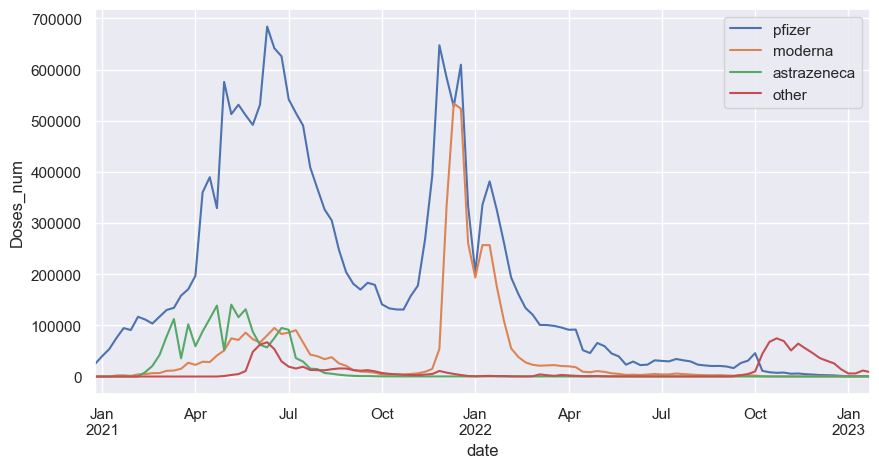

In [107]:
#What is the contribution of each manufacturer (including other manufactorers)?
week_vac[['pfizer', 'moderna','astrazeneca','other']].plot(figsize=(10,5), ylabel="Doses_num")
plt.show()

In [97]:
#Percentage of each manufacturer
vaccines['pfizer%']=(vaccines['pfizer']/vaccines['doses'])*100
vaccines['moderna%']=(vaccines['moderna']/vaccines['doses'])*100
vaccines['astrazeneca%']=(vaccines['astrazeneca']/vaccines['doses'])*100
vaccines['other%']=(vaccines['other']/vaccines['doses'])*100
print(vaccines.shape)
vaccines.tail(10)
#df[percent] = (df['column_name'] / df['column_name'].sum()) * 100

(757, 18)


,doses,doses_first,doses_second,doses_third,persons_full,persons_first_cumul,persons_full_cumul,pfizer_cumul,moderna_cumul,astrazeneca_cumul,pfizer,moderna,astrazeneca,pfizer%,moderna%,astrazeneca%,other,other%
date,,,,,,,,,,,,,,,,,,
2023-01-13,17508,371,342,16795,342.0,64865053,63552354,138011328,31577742,12803023,1176.0,206.0,1.0,6.716929,1.176605,0.005712,16125.0,92.100754
2023-01-14,2901,63,68,2770,68.0,64865116,63552422,138011559,31577752,12803023,231.0,10.0,0.0,7.962771,0.344709,0.000000,2660.0,91.692520
2023-01-15,1536,27,33,1476,33.0,64865143,63552455,138011843,31577843,12803023,284.0,91.0,0.0,18.489583,5.924479,0.000000,1161.0,75.585938
2023-01-16,6997,134,148,6715,148.0,64865277,63552603,138012394,31577873,12803023,551.0,30.0,0.0,7.874803,0.428755,0.000000,6416.0,91.696441
2023-01-17,14922,302,252,14368,252.0,64865579,63552855,138013524,31577881,12803023,1130.0,8.0,0.0,7.572711,0.053612,0.000000,13784.0,92.373676
2023-01-18,15120,688,312,14120,312.0,64866267,63553167,138014658,31577922,12803023,1134.0,41.0,0.0,7.500000,0.271164,0.000000,13945.0,92.228836
2023-01-19,16594,314,381,15899,381.0,64866581,63553548,138015809,31577955,12803023,1151.0,33.0,0.0,6.936242,0.198867,0.000000,15410.0,92.864891
2023-01-20,10565,334,235,9996,235.0,64866915,63553783,138016521,31578012,12803023,712.0,57.0,0.0,6.739233,0.539517,0.000000,9796.0,92.721249
2023-01-21,1395,45,19,1331,19.0,64866960,63553802,138016565,31578013,12803023,44.0,1.0,0.0,3.154122,0.071685,0.000000,1350.0,96.774194


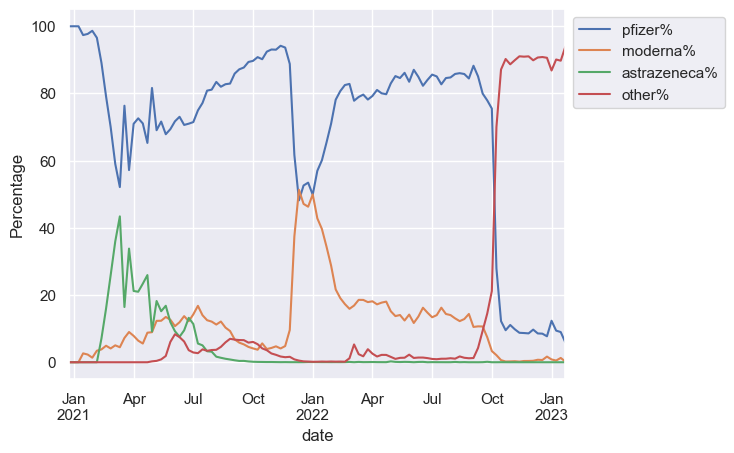

In [103]:
#What is the percentage usege of each manufacturer?
week_vac[['pfizer%', 'moderna%','astrazeneca%','other%']].plot(ylabel='Percentage')
plt.legend(bbox_to_anchor=(1.0, 1.0))
# In Jan 22 it was a reduction in pfizer use that was replaced by moderna
#astrazeneca was mainly used in the begining Feb-Jul 21 and abundunt afterwords. 
#Starting from Sep 2022 there is a shift to other manufacturers.

### Vaccination patterns

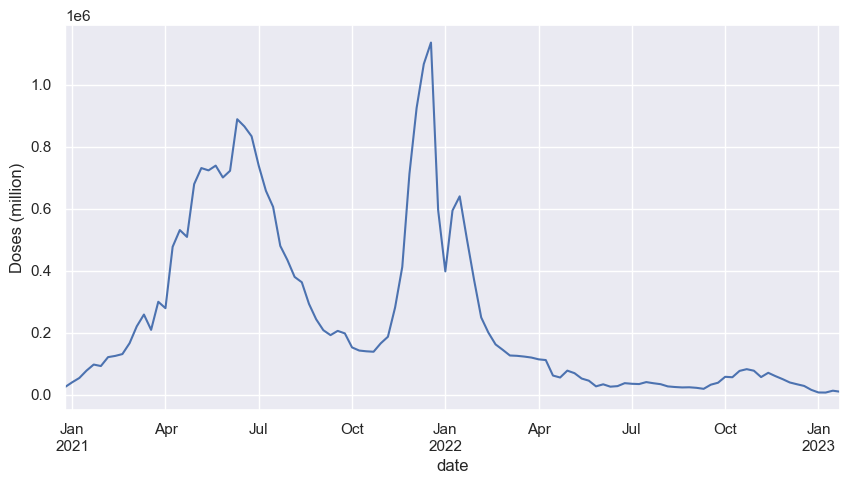

In [52]:
#Vaccination pattern
week_vac['doses'].plot(ylabel="Doses (million)", figsize=(10,5))
plt.show()


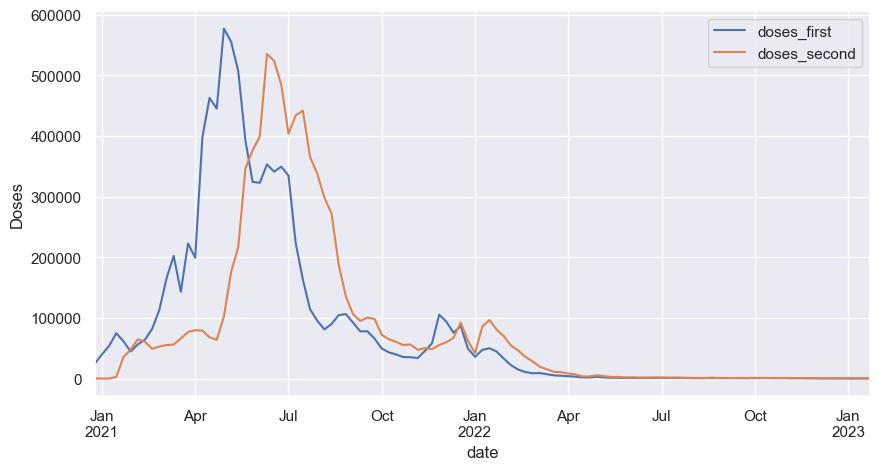

In [55]:
#First vs second dose pattern
week_vac[['doses_first', 'doses_second']].plot(ylabel="Doses", figsize=(10,5))
plt.show()

In [20]:
#when dose1+dose2 ==daily doses?
print(f"There are only {len(vaccines[(vaccines['doses']==vaccines['doses_first']+vaccines['doses_second'])].index)} \
dated in which dose1 +dose2 =total daily doses")

There are only 155 dated in which dose1 +dose2 =total daily doses


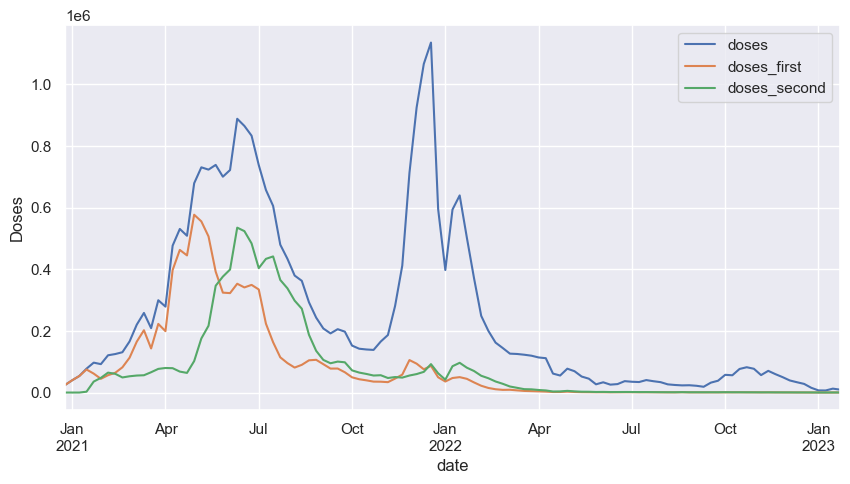

In [56]:
#total doses , first and second shot
week_vac[['doses', 'doses_first', 'doses_second']].plot(ylabel="Doses", figsize=(10,5))
plt.show()
# There is a third dose not presented in the data

In [21]:
#calculate the third dose and add as another column
vaccines['doses_third']=vaccines['doses']-(vaccines['doses_first']+vaccines['doses_second'])
vaccines.head()

,doses,doses_first,doses_second,pfizer_cumul,moderna_cumul,astrazeneca_cumul,persons_first_cumul,persons_full_cumul,pfizer,moderna,astrazeneca,doses_third
date,,,,,,,,,,,,
2020-12-27,24427,24427,0,24418,8,1,24427,0,24418.0,8.0,1.0,0
2020-12-28,18073,18073,0,42489,9,2,42500,0,18071.0,1.0,1.0,0
2020-12-29,50229,50229,0,92717,9,3,92729,0,50228.0,0.0,1.0,0
2020-12-30,64213,64213,0,156929,10,3,156942,0,64212.0,1.0,0.0,0
2020-12-31,49985,49985,0,206912,12,3,206927,0,49983.0,2.0,0.0,0


In [22]:
#create another column with fully vacinated people ( caculate from cumsum)
vaccines['persons_full']=vaccines['persons_full_cumul'].diff().fillna(vaccines['persons_full_cumul'].iloc[0])
new_cols=['doses', 'doses_first', 'doses_second', 'doses_third','persons_full', 'persons_first_cumul', 'persons_full_cumul',
          'pfizer_cumul', 'moderna_cumul','astrazeneca_cumul', 
       'pfizer', 'moderna', 'astrazeneca', 'other','pfizer%', 'moderna%','astrazeneca%','other%']
vaccines=vaccines.reindex(columns=new_cols)
vaccines.tail(10)
#persons_full= 2 doses of vaccine ( not 3)

,doses,doses_first,doses_second,doses_third,persons_full,persons_first_cumul,persons_full_cumul,pfizer_cumul,moderna_cumul,astrazeneca_cumul,pfizer,moderna,astrazeneca,other,pfizer%,moderna%,astrazeneca%,other%
date,,,,,,,,,,,,,,,,,,
2023-01-13,17508,371,342,16795,342.0,64865053,63552354,138011328,31577742,12803023,1176.0,206.0,1.0,NaN,NaN,NaN,NaN,NaN
2023-01-14,2901,63,68,2770,68.0,64865116,63552422,138011559,31577752,12803023,231.0,10.0,0.0,NaN,NaN,NaN,NaN,NaN
2023-01-15,1536,27,33,1476,33.0,64865143,63552455,138011843,31577843,12803023,284.0,91.0,0.0,NaN,NaN,NaN,NaN,NaN
2023-01-16,6997,134,148,6715,148.0,64865277,63552603,138012394,31577873,12803023,551.0,30.0,0.0,NaN,NaN,NaN,NaN,NaN
2023-01-17,14922,302,252,14368,252.0,64865579,63552855,138013524,31577881,12803023,1130.0,8.0,0.0,NaN,NaN,NaN,NaN,NaN
2023-01-18,15120,688,312,14120,312.0,64866267,63553167,138014658,31577922,12803023,1134.0,41.0,0.0,NaN,NaN,NaN,NaN,NaN
2023-01-19,16594,314,381,15899,381.0,64866581,63553548,138015809,31577955,12803023,1151.0,33.0,0.0,NaN,NaN,NaN,NaN,NaN
2023-01-20,10565,334,235,9996,235.0,64866915,63553783,138016521,31578012,12803023,712.0,57.0,0.0,NaN,NaN,NaN,NaN,NaN
2023-01-21,1395,45,19,1331,19.0,64866960,63553802,138016565,31578013,12803023,44.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN


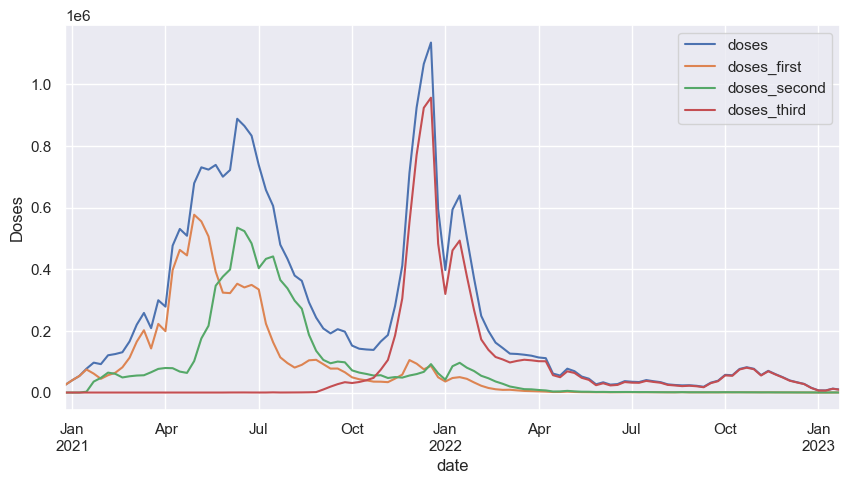

In [65]:
#Present total doses, first, second and third
week_vac[['doses', 'doses_first', 'doses_second','doses_third']].plot(ylabel="Doses", figsize=(10,5))
plt.show()

In [26]:
#calculate cumsum for third dose
vaccines['persons_third_cumul']=vaccines['doses_third'].cumsum()
vaccines


,doses,doses_first,doses_second,doses_third,persons_full,persons_first_cumul,persons_full_cumul,pfizer_cumul,moderna_cumul,astrazeneca_cumul,pfizer,moderna,astrazeneca,other,pfizer%,moderna%,astrazeneca%,other%,persons_third_cumul
date,,,,,,,,,,,,,,,,,,,
2020-12-27,24427,24427,0,0,0.0,24427,0,24418,8,1,24418.0,8.0,1.0,NaN,NaN,NaN,NaN,NaN,0
2020-12-28,18073,18073,0,0,0.0,42500,0,42489,9,2,18071.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,0
2020-12-29,50229,50229,0,0,0.0,92729,0,92717,9,3,50228.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,0
2020-12-30,64213,64213,0,0,0.0,156942,0,156929,10,3,64212.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,0
2020-12-31,49985,49985,0,0,0.0,206927,0,206912,12,3,49983.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-18,15120,688,312,14120,312.0,64866267,63553167,138014658,31577922,12803023,1134.0,41.0,0.0,NaN,NaN,NaN,NaN,NaN,64544143
2023-01-19,16594,314,381,15899,381.0,64866581,63553548,138015809,31577955,12803023,1151.0,33.0,0.0,NaN,NaN,NaN,NaN,NaN,64560042
2023-01-20,10565,334,235,9996,235.0,64866915,63553783,138016521,31578012,12803023,712.0,57.0,0.0,NaN,NaN,NaN,NaN,NaN,64570038


<AxesSubplot:xlabel='date', ylabel='Doses'>

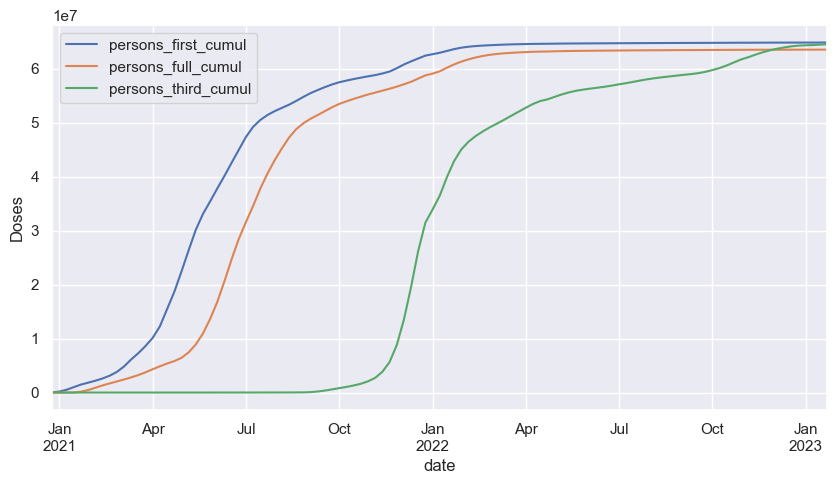

In [30]:
#What is the percentage of total population is vaccinated?
week_vac[['persons_first_cumul', 'persons_full_cumul','persons_third_cumul']].plot(ylabel="Doses", figsize=(10,5))
plt.show()

In [38]:
#Total population in Germany
print(demo['population'].sum())
#calculate % of vaccinated with first, second, third dose out of total population
vaccines['first_dose%']=(vaccines['persons_first_cumul']/demo['population'].sum())*100
vaccines['second_dose%']=(vaccines['persons_full_cumul']/demo['population'].sum())*100
vaccines['third_dose%']=(vaccines['persons_third_cumul']/demo['population'].sum())*100
vaccines


83019213


,doses,doses_first,doses_second,doses_third,persons_full,persons_first_cumul,persons_full_cumul,pfizer_cumul,moderna_cumul,astrazeneca_cumul,...,astrazeneca,other,pfizer%,moderna%,astrazeneca%,other%,persons_third_cumul,first_dose%,second_dose%,third_dose%
date,,,,,,,,,,,,,,,,,,,,,
2020-12-27,24427,24427,0,0,0.0,24427,0,24418,8,1,...,1.0,NaN,NaN,NaN,NaN,NaN,0,0.029423,0.000000,0.000000
2020-12-28,18073,18073,0,0,0.0,42500,0,42489,9,2,...,1.0,NaN,NaN,NaN,NaN,NaN,0,0.051193,0.000000,0.000000
2020-12-29,50229,50229,0,0,0.0,92729,0,92717,9,3,...,1.0,NaN,NaN,NaN,NaN,NaN,0,0.111696,0.000000,0.000000
2020-12-30,64213,64213,0,0,0.0,156942,0,156929,10,3,...,0.0,NaN,NaN,NaN,NaN,NaN,0,0.189043,0.000000,0.000000
2020-12-31,49985,49985,0,0,0.0,206927,0,206912,12,3,...,0.0,NaN,NaN,NaN,NaN,NaN,0,0.249252,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-18,15120,688,312,14120,312.0,64866267,63553167,138014658,31577922,12803023,...,0.0,NaN,NaN,NaN,NaN,NaN,64544143,78.134042,76.552360,77.746031
2023-01-19,16594,314,381,15899,381.0,64866581,63553548,138015809,31577955,12803023,...,0.0,NaN,NaN,NaN,NaN,NaN,64560042,78.134421,76.552819,77.765182
2023-01-20,10565,334,235,9996,235.0,64866915,63553783,138016521,31578012,12803023,...,0.0,NaN,NaN,NaN,NaN,NaN,64570038,78.134823,76.553102,77.777222


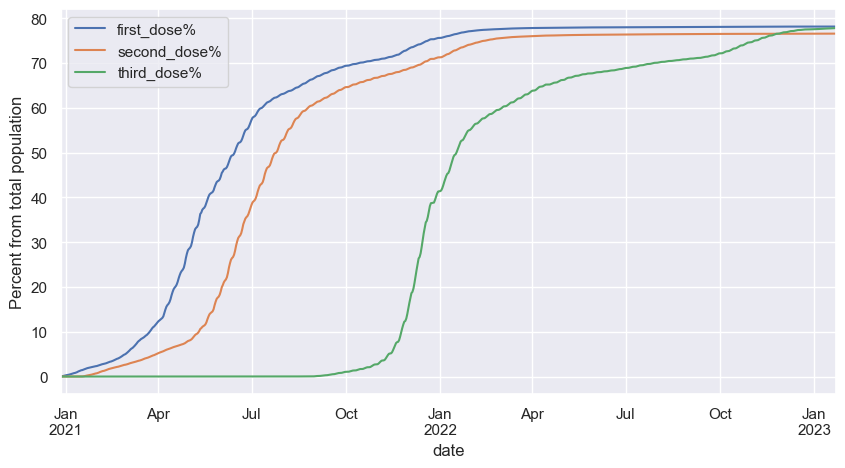

In [40]:
#The percentage of total population is vaccinated?
vaccines[['first_dose%','second_dose%','third_dose%']].plot(ylabel="Percent from total population", figsize=(10,5))
plt.show()

## Effect of vaccination on number of cases and deaths

In [144]:
covid

,state,county,age_group,gender,cases,deaths,recovered
date,,,,,,,
2020-03-27,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,1,0,1
2020-03-28,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,1,0,1
2020-04-03,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,1,0,1
2020-10-18,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,1,0,1
2020-10-22,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,1,0,1
...,...,...,...,...,...,...,...
2021-12-23,Thueringen,SK Weimar,NaN,F,1,0,1
2022-08-11,Thueringen,SK Weimar,NaN,F,1,0,1
2022-09-19,Thueringen,SK Weimar,NaN,F,1,0,1


In [162]:
covid_vaccines = covid.join(vaccines, how = 'left') 
covid_vaccines

,state,county,age_group,gender,cases,deaths,recovered,doses,doses_first,doses_second,...,astrazeneca,other,pfizer%,moderna%,astrazeneca%,other%,persons_third_cumul,first_dose%,second_dose%,third_dose%
date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,Nordrhein-Westfalen,LK Maerkischer Kreis,80-99,M,1,0,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-23,Saarland,LK Stadtverband Saarbruecken,80-99,M,1,0,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-28,Bayern,LK Landsberg a.Lech,15-34,M,1,0,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-28,Bayern,LK Starnberg,35-59,M,1,0,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-29,Bayern,LK Fuerstenfeldbruck,15-34,M,1,0,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-24,Baden-Wuerttemberg,SK Mannheim,15-34,M,3,0,0,969.0,44.0,76.0,...,0.0,NaN,NaN,NaN,NaN,NaN,64330657.0,78.128641,76.5465,77.488878
2022-12-24,Baden-Wuerttemberg,SK Mannheim,35-59,F,4,0,0,969.0,44.0,76.0,...,0.0,NaN,NaN,NaN,NaN,NaN,64330657.0,78.128641,76.5465,77.488878
2022-12-24,Baden-Wuerttemberg,SK Mannheim,35-59,M,1,0,0,969.0,44.0,76.0,...,0.0,NaN,NaN,NaN,NaN,NaN,64330657.0,78.128641,76.5465,77.488878


In [164]:
covid_vaccines.isnull().sum()

state                        0
county                       0
age_group                14023
gender                  125291
cases                        0
deaths                       0
recovered                    0
doses                   393903
doses_first             393903
doses_second            393903
doses_third             393903
persons_full            393903
persons_first_cumul     393903
persons_full_cumul      393903
pfizer_cumul            393903
moderna_cumul           393903
astrazeneca_cumul       393903
pfizer                  393903
moderna                 393903
astrazeneca             393903
other                  2790555
pfizer%                2790555
moderna%               2790555
astrazeneca%           2790555
other%                 2790555
persons_third_cumul     393903
first_dose%             393903
second_dose%            393903
third_dose%             393903
dtype: int64

## Join demo table with covid table to add the population 

In [152]:
#join covid table with demo table
covid_group=pd.DataFrame(covid.groupby(['state','gender','age_group']).agg('sum').round(0)) #setting the indexes
Dict = {'female':'F', 'male':'M'} # convert gender to be the same 
demo1=demo.replace({'gender':Dict})
demo1=demo1.set_index(['state','gender','age_group']) # setting the same index as in covid table to anable mearge

# create joined df 
covid_demo = covid_group.join(demo1, how = 'left') 
covid_demo

cases  deaths  recovered  population
state              gender age_group                                        
Baden-Wuerttemberg F      00-04        66249       4      66032      261674
                          05-14       293446       4     292887      490822
                          15-34       764362      21     756813     1293488
                          35-59      1003754     298     989018     1919649
                          60-79       319322    1892     311156     1182736
...                                      ...     ...        ...         ...
Thueringen         M      05-14        51182       1      51104       92545
                          15-34        99821      14      99243      214553
                          35-59       161201     251     159711      384822
                          60-79        63165    1639      60783      264189
                          80-99        17266    2397      14491       57340

[192 rows x 4 columns]

In [157]:
#add percentage of population columns
def PercentagePerPolpulation(part_of_population, population):
    #return part_of_population/population.astype(float).map("{:.2%}".format)
    return part_of_population/population

covid_demo['cases per population'] = covid_demo.apply(lambda x: PercentagePerPolpulation(x['cases'],x['population']), axis = 1)
covid_demo['deaths per population'] = covid_demo.apply(lambda x: PercentagePerPolpulation(x['deaths'],x['population']), axis = 1)
covid_demo['recoveries per population'] = covid_demo.apply(lambda x: PercentagePerPolpulation(x['recovered'],x['population']), axis = 1)
covid_demo

cases  deaths  recovered  population  \
state              gender age_group                                           
Baden-Wuerttemberg F      00-04        66249       4      66032      261674   
                          05-14       293446       4     292887      490822   
                          15-34       764362      21     756813     1293488   
                          35-59      1003754     298     989018     1919649   
                          60-79       319322    1892     311156     1182736   
...                                      ...     ...        ...         ...   
Thueringen         M      05-14        51182       1      51104       92545   
                          15-34        99821      14      99243      214553   
                          35-59       161201     251     159711      384822   
                          60-79        63165    1639      60783      264189   
                          80-99        17266    2397      14491       57340   

                                     cases per population  \
state              gender age_group                         
Baden-Wuerttemberg F      00-04                  0.253174   
                          05-14                  0.597866   
                          15-34                  0.590931   
                          35-59                  0.522884   
                          60-79                  0.269986   
...                                                   ...   
Thueringen         M      05-14                  0.553050   
                          15-34                  0.465251   
                          35-59                  0.418898   
                          60-79                  0.239090   
                          80-99                  0.301116   

                                     deaths per population  \
state              gender age_group                          
Baden-Wuerttemberg F      00-04                   0.000015   
                          05-14                   0.000008   
                          15-34                   0.000016   
                          35-59                   0.000155   
                          60-79                   0.001600   
...                                                    ...   
Thueringen         M      05-14                   0.000011   
                          15-34                   0.000065   
                          35-59                   0.000652   
                          60-79                   0.006204   
                          80-99                   0.041803   

                                     recoveries per population  
state              gender age_group                             
Baden-Wuerttemberg F      00-04                       0.252345  
                          05-14                       0.596728  
                          15-34                       0.585095  
                          35-59                       0.515208  
                          60-79                       0.263082  
...                                                        ...  
Thueringen         M      05-14                       0.552207  
                          15-34                       0.462557  
                          35-59                       0.415026  
                          60-79                       0.230074  
                          80-99                       0.252721  

[192 rows x 7 columns]

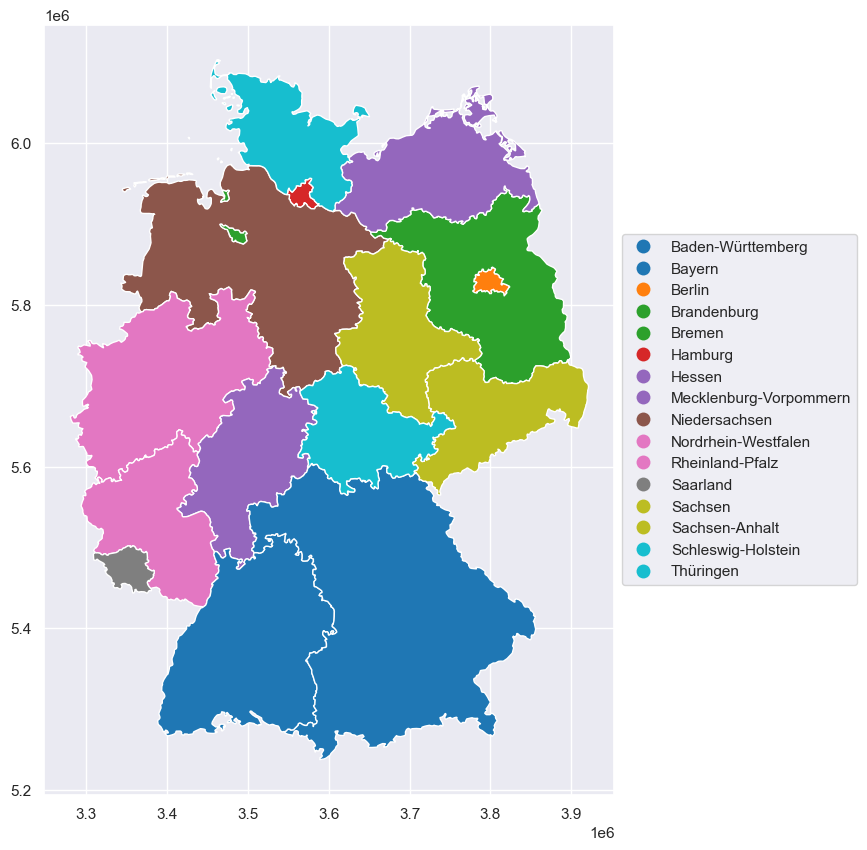

In [159]:
# Map presentation with geoPandas
gdf = gpd.read_file("C:\\Users\DannyC19\Desktop\Python\EDA project\Germany\de_state.shp")
gdf.plot(categorical = True, column = 'GEN', legend = True,figsize = (10,10),edgecolor = 'white', legend_kwds = {'loc': 'center left', 'bbox_to_anchor':(1,0.5)})
plt.show()